In [49]:
from encephalon import *
from axon import *
from pons import *
import numpy as np
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [50]:
# ser = serial_innit()

In [51]:
ser , port = test_serial()
run_sim(ANN([2,1,1]),port)

In [52]:
model = NN([2,1,1],ser)

In [53]:
print(model.W)
print(model.b)

{1: array([[-1.32651124],
       [ 2.44645423]]), 2: array([[2.3621056]])}
{1: array([[0.]]), 2: array([[0.]])}


In [54]:
# model.W = {1: np.array([[ 1.0],[1.1]]), 2: np.array([[2]])}
# model.b = {1: np.array([[0.]]), 2: np.array([[0.]])}

In [55]:
NN.set_weights_and_biases(model)

In [56]:
for _ in range(6):
    print(serial_read(ser,0.5))

In [57]:
# serial_monitor(ser)

In [58]:
# print(serial_write_and_await(ser, "SET I0 2.5"))

In [59]:
# print(serial_write_and_await(ser, "READ O0"))

[[0.0, 0.0, 0.0], [0.0, 1.0, 5.778783235434429], [0.0, 2.0, 11.557566470868858], [0.0, 3.0, 17.336349706303288], [0.0, 4.0, 23.115132941737716], [0.0, 5.0, 28.893916177172148], [1.0, 0.0, 0.0], [1.0, 1.0, 2.6454235973125946], [1.0, 2.0, 8.424206832747023], [1.0, 3.0, 14.202990068181451], [1.0, 4.0, 19.98177330361588], [1.0, 5.0, 25.760556539050313], [2.0, 0.0, 0.0], [2.0, 1.0, 0.0], [2.0, 2.0, 5.290847194625189], [2.0, 3.0, 11.069630430059616], [2.0, 4.0, 16.848413665494046], [2.0, 5.0, 22.627196900928478], [3.0, 0.0, 0.0], [3.0, 1.0, 0.0], [3.0, 2.0, 2.1574875565033547], [3.0, 3.0, 7.936270791937782], [3.0, 4.0, 13.715054027372213], [3.0, 5.0, 19.493837262806647], [4.0, 0.0, 0.0], [4.0, 1.0, 0.0], [4.0, 2.0, 0.0], [4.0, 3.0, 4.8029111538159475], [4.0, 4.0, 10.581694389250378], [4.0, 5.0, 16.36047762468481], [5.0, 0.0, 0.0], [5.0, 1.0, 0.0], [5.0, 2.0, 0.0], [5.0, 3.0, 1.6695515156941119], [5.0, 4.0, 7.4483347511285425], [5.0, 5.0, 13.227117986562973]]


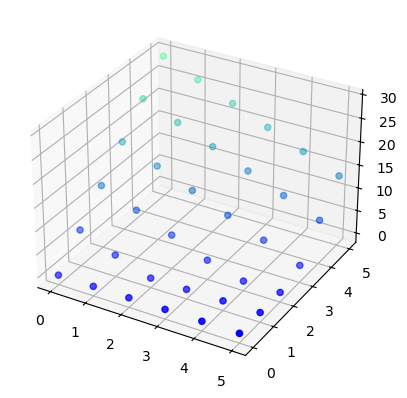

In [60]:
points = []
sub = 6

for x in np.linspace(0, 5, sub):
    for y in np.linspace(0, 5, sub):
        z = model.use([x, y], 100)
        if z is None:
            print(f"No response for input: {[x, y]}")
            continue
        points.append([float(x), float(y), float(z[0][0])])

# for x in np.linspace(0, 5, sub):
#         z = model.use([x,0],5)
#         points.append([x,0,z[0]])

print(points)
points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()